In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile,chi2,SelectKBest, f_regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor

reading data

In [285]:
df = pd.read_csv('FIFA_data.csv.xls')
df.shape

(18207, 89)

In [286]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

check for nulls

In [288]:
StrCol = df.select_dtypes(include=np.object_).columns

df[StrCol].isna().sum()

Name                        0
Photo                       0
Nationality                 0
Flag                        0
Club                      241
Club Logo                   0
Value                       0
Wage                        0
Preferred Foot             48
Work Rate                  48
Body Type                  48
Real Face                  48
Position                   60
Joined                   1553
Loaned From             16943
Contract Valid Until      289
Height                     48
Weight                     48
LS                       2085
ST                       2085
RS                       2085
LW                       2085
LF                       2085
CF                       2085
RF                       2085
RW                       2085
LAM                      2085
CAM                      2085
RAM                      2085
LM                       2085
LCM                      2085
CM                       2085
RCM                      2085
RM        

fill nulls in objects

In [289]:
StrCol = df.select_dtypes(include=object).columns

# Initialize SimpleImputer with strategy 'most_frequent'
SI = SimpleImputer(strategy='most_frequent')

# Fit and transform the selected columns
df[StrCol] = SI.fit_transform(df[StrCol])

# Check for any remaining NaN values in these columns
na_counts = df[StrCol].isna().sum()
print(na_counts)

Name                    0
Photo                   0
Nationality             0
Flag                    0
Club                    0
Club Logo               0
Value                   0
Wage                    0
Preferred Foot          0
Work Rate               0
Body Type               0
Real Face               0
Position                0
Joined                  0
Loaned From             0
Contract Valid Until    0
Height                  0
Weight                  0
LS                      0
ST                      0
RS                      0
LW                      0
LF                      0
CF                      0
RF                      0
RW                      0
LAM                     0
CAM                     0
RAM                     0
LM                      0
LCM                     0
CM                      0
RCM                     0
RM                      0
LWB                     0
LDM                     0
CDM                     0
RDM                     0
RWB         

fill nulls for numbers

In [290]:
NumCol = df.select_dtypes(include=np.number).columns
SI1 = SimpleImputer(strategy='mean')
df[NumCol] = SI1.fit_transform(df[NumCol])

na_counts = df[NumCol].isna().sum()
print(na_counts)

Unnamed: 0                  0
ID                          0
Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision    

Function to convert the currency into numbers

In [291]:
def convert_currency_string(s):
    # Dictionary to map multipliers to their values
    multipliers = {
        'K': 1e3,
        'M': 1e6,
        'B': 1e9,
        'T': 1e12
    }

    # Remove the currency symbol
    s = s.replace('€', '').replace('$', '').replace('£', '')

    # Identify the multiplier
    multiplier = s[-1]
    if multiplier in multipliers:
        return float(s[:-1]) * multipliers[multiplier]
    else:
        return float(s)


In [292]:
MoneyColumns = ['Value','Wage','Release Clause']
df[MoneyColumns] = df[MoneyColumns].applymap(convert_currency_string)
df[MoneyColumns]

C:\Users\PC\AppData\Local\Temp\ipykernel_26016\1835767345.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[MoneyColumns] = df[MoneyColumns].applymap(convert_currency_string)


,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0
...,...,...,...
18202,60000.0,1000.0,143000.0
18203,60000.0,1000.0,113000.0
18204,60000.0,1000.0,165000.0
18205,60000.0,1000.0,143000.0


Function to calculate the overall of each position

In [293]:
def Convert_positions_rate(eq):
    num1 = int(eq[:-2])
    num2 = int(eq[-1])
    return num1+num2

In [294]:

df.loc[:,'LS':'RB'] = df.loc[:,'LS':'RB'].applymap(Convert_positions_rate)
df.loc[:,'LS':'RB']

C:\Users\PC\AppData\Local\Temp\ipykernel_26016\225229907.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,'LS':'RB'] = df.loc[:,'LS':'RB'].applymap(Convert_positions_rate)


,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90,90,90,94,95,95,95,94,95,95,...,66,63,63,63,66,61,49,49,49,61
1,94,94,94,92,93,93,93,92,91,91,...,68,64,64,64,68,64,56,56,56,64
2,87,87,87,92,92,92,92,92,92,92,...,68,63,63,63,68,63,50,50,50,63
3,63,63,63,65,63,63,63,65,63,63,...,63,64,64,64,63,63,65,65,65,63
4,85,85,85,90,90,90,90,90,91,91,...,80,80,80,80,80,76,69,69,69,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,44,44,44,46,46,46,46,46,47,47,...,46,47,47,47,46,47,47,47,47,47
18203,47,47,47,41,44,44,44,41,42,42,...,32,33,33,33,32,31,34,34,34,31
18204,47,47,47,47,48,48,48,47,46,46,...,36,32,32,32,36,35,30,30,30,35
18205,49,49,49,49,48,48,48,49,47,47,...,38,34,34,34,38,37,33,33,33,37


Select which columns to drop from objects

In [295]:
objectCol= df.select_dtypes(include=object).columns
objectCol

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB'],
      dtype='object')

Dropping columns


In [296]:
ColToDrop = ['ID','Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo',
       'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight']
df = df.drop(ColToDrop,axis=1)
df = df.iloc[:,1:]
df

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31.0,94.0,94.0,110500000.0,565000.0,2202.0,5.0,4.0,4.0,10.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33.0,94.0,94.0,77000000.0,405000.0,2228.0,5.0,4.0,5.0,7.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26.0,92.0,93.0,118500000.0,290000.0,2143.0,5.0,5.0,5.0,10.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27.0,91.0,93.0,72000000.0,260000.0,1471.0,4.0,3.0,1.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27.0,91.0,92.0,102000000.0,355000.0,2281.0,4.0,5.0,4.0,7.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,47.0,65.0,60000.0,1000.0,1307.0,1.0,2.0,2.0,22.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,19.0,47.0,63.0,60000.0,1000.0,1098.0,1.0,2.0,2.0,21.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,16.0,47.0,67.0,60000.0,1000.0,1189.0,1.0,3.0,2.0,33.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,17.0,47.0,66.0,60000.0,1000.0,1228.0,1.0,3.0,2.0,34.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


Correlation of Overall feature

In [297]:
df.corr()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,1.000000,0.452350,-0.253312,0.075022,0.141145,0.236695,0.253464,0.059796,0.027616,-0.240751,...,0.390560,0.142647,0.119603,0.102967,0.101157,0.106293,0.104839,0.116264,0.103190,0.065073
Overall,0.452350,1.000000,0.660939,0.627085,0.571926,0.606960,0.499243,0.211910,0.414257,-0.218709,...,0.727293,0.286363,0.252503,0.222700,-0.025924,-0.025049,-0.029358,-0.017666,-0.023264,0.592035
Potential,-0.253312,0.660939,1.000000,0.576218,0.486413,0.383727,0.372375,0.162077,0.353703,-0.010450,...,0.439279,0.162531,0.143326,0.128766,-0.053357,-0.054581,-0.058964,-0.052502,-0.053252,0.551895
Value,0.075022,0.627085,0.576218,1.000000,0.858442,0.377738,0.653059,0.165192,0.315595,-0.095110,...,0.450271,0.133838,0.108383,0.087720,-0.028591,-0.028889,-0.030917,-0.027887,-0.028539,0.969670
Wage,0.141145,0.571926,0.486413,0.858442,1.000000,0.347835,0.668515,0.140823,0.263158,-0.086540,...,0.419521,0.145568,0.126268,0.111005,-0.025590,-0.025173,-0.028320,-0.025484,-0.025987,0.823151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKHandling,0.106293,-0.025049,-0.054581,-0.028889,-0.025173,-0.673418,0.003942,-0.233098,-0.619755,0.001543,...,-0.375720,-0.552263,-0.532160,-0.510591,0.970280,1.000000,0.965239,0.969408,0.970264,-0.023950
GKKicking,0.104839,-0.029358,-0.058964,-0.030917,-0.028320,-0.670048,0.000651,-0.229395,-0.616990,0.001162,...,-0.374897,-0.549498,-0.531092,-0.509378,0.965685,0.965239,1.000000,0.964336,0.966337,-0.025897
GKPositioning,0.116264,-0.017666,-0.052502,-0.027887,-0.025484,-0.668067,0.006904,-0.231298,-0.618853,-0.002735,...,-0.370234,-0.546670,-0.527792,-0.505792,0.969864,0.969408,0.964336,1.000000,0.970130,-0.022362
GKReflexes,0.103190,-0.023264,-0.053252,-0.028539,-0.025987,-0.673031,0.003444,-0.232574,-0.621925,0.003254,...,-0.377626,-0.551290,-0.531474,-0.509425,0.973320,0.970264,0.966337,0.970130,1.000000,-0.023791


In [298]:
corr=df.corr()[['Overall']]
corr.sort_values(by='Overall', ascending=False)

,Overall
Overall,1.000000
Reactions,0.849622
Composure,0.727293
RCM,0.717505
CM,0.717505
...,...
GKReflexes,-0.023264
GKHandling,-0.025049
GKDiving,-0.025924
GKKicking,-0.029358


Showing Heatmap of correlation

<Axes: >

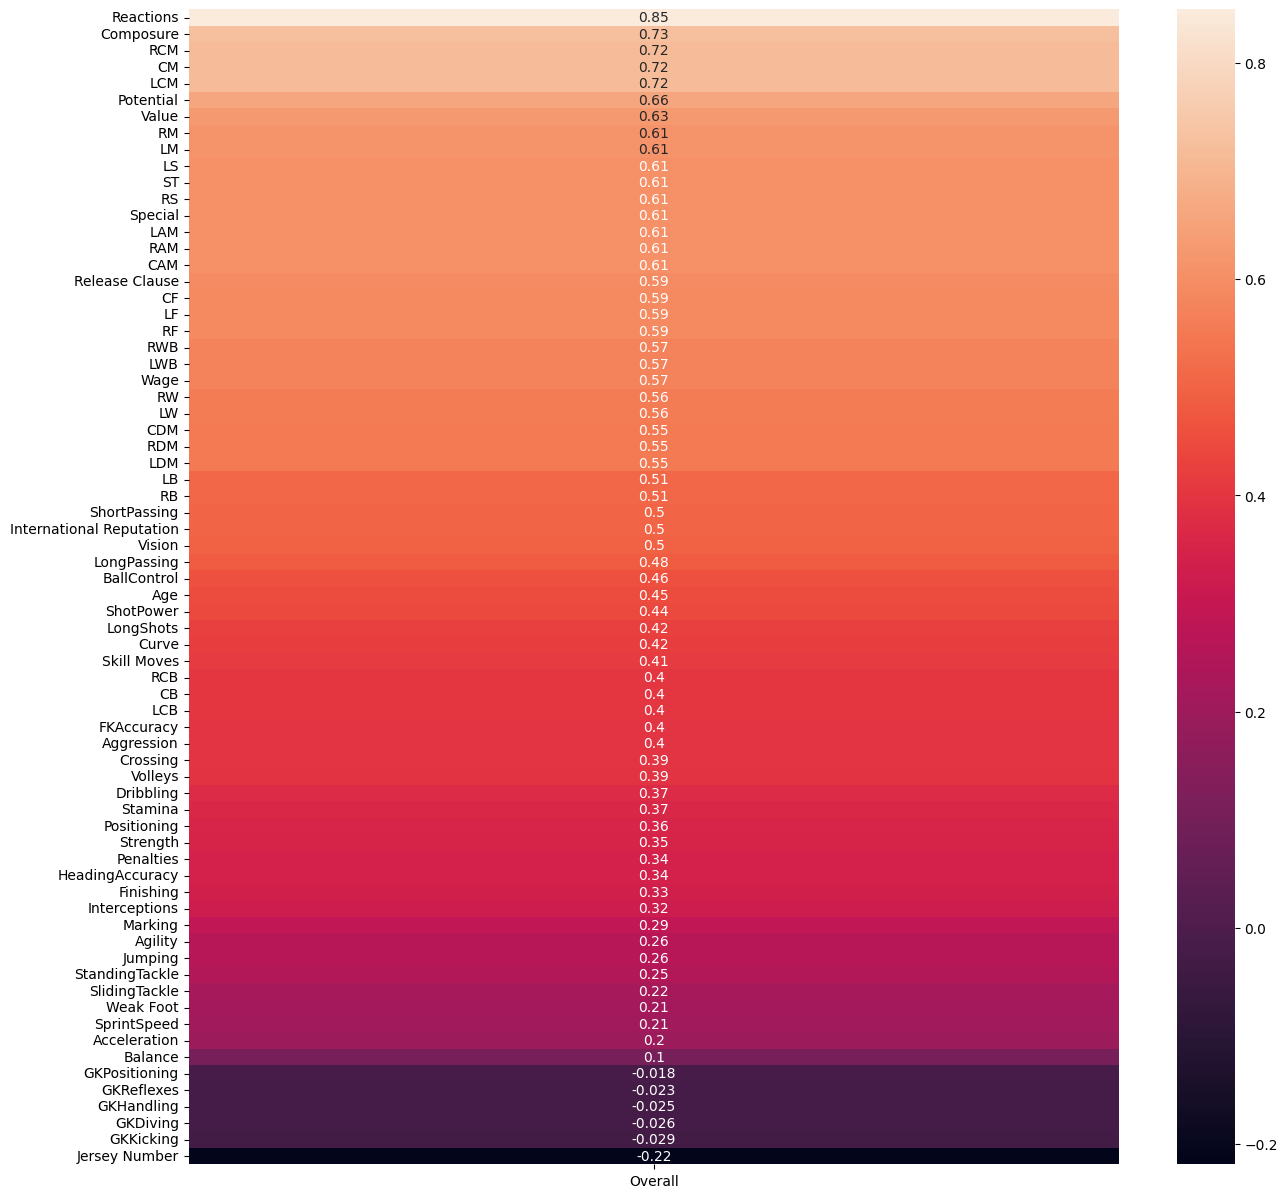

In [299]:

fig , ax = plt.subplots(figsize=(15,15))
corr=df.corr()[['Overall']]
corr.drop(['Overall'], axis=0, inplace=True)      
sns.heatmap(corr.sort_values(by='Overall', ascending=False), ax=ax, annot=True)

In [300]:
df.shape

(18207, 71)

removing outliers

In [301]:
for column in df.columns:
    mean = df[column].mean()
    std = df[column].std()
    threshold = 3
    df['z_score'] = (df[column] - mean) / std
    df = df[df['z_score'].abs() <= threshold]
df = df.drop('z_score',axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_26016\2883741061.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score'] = (df[column] - mean) / std


In [302]:
df.shape

(13174, 71)

Splitting data

In [303]:
X = df.drop('Overall',axis=1)
y = df['Overall']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


Scaling X_train, X_test

In [304]:
Scale = StandardScaler()

Scale.fit(X_train)

X_train_scaled = Scale.transform(X_train)
X_test_scaled = Scale.transform(X_test)

In [305]:

X_train_scaled.shape

(10539, 70)

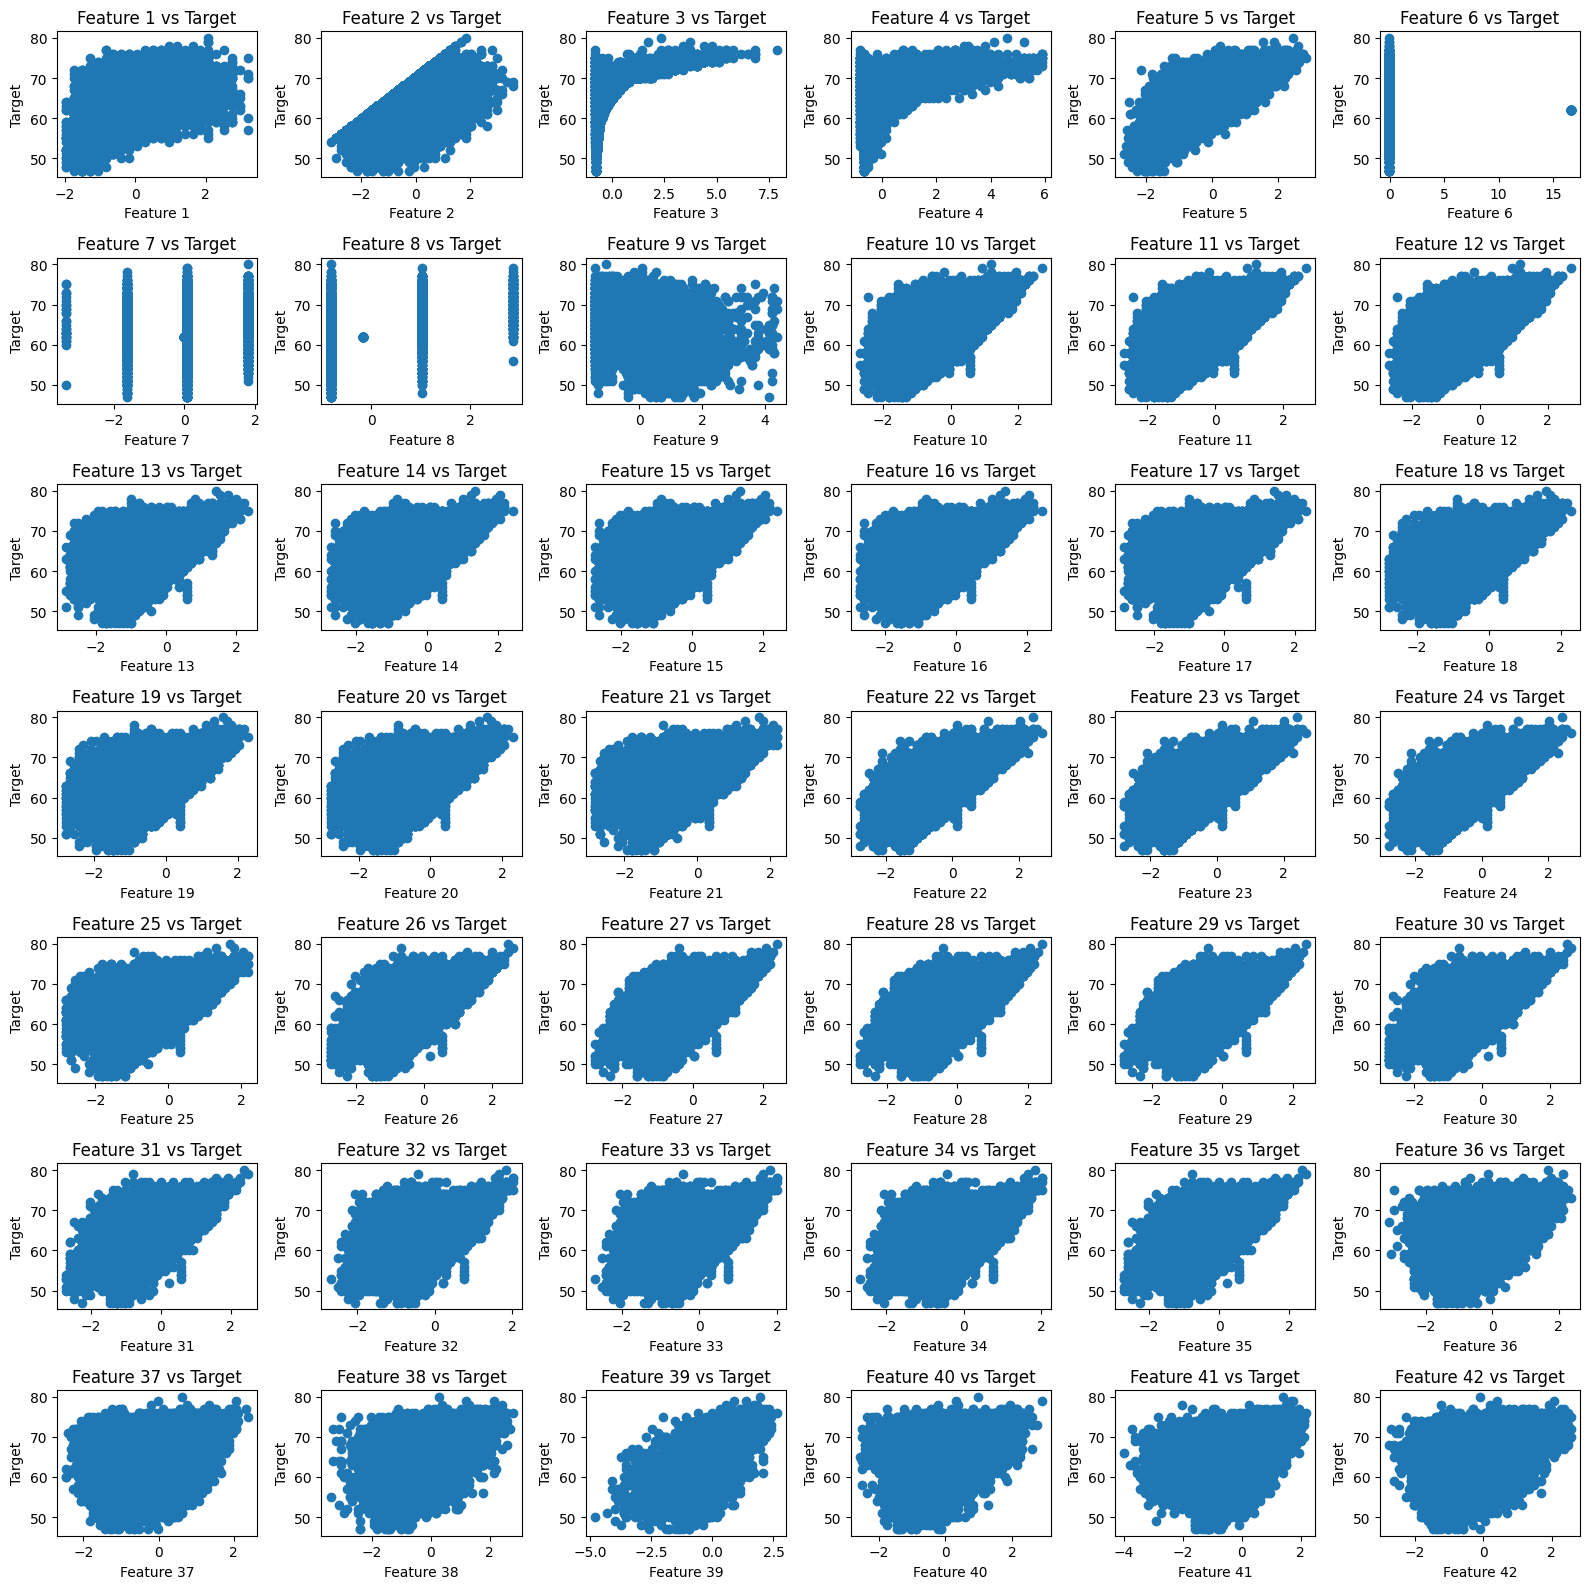

In [306]:
plt.figure(figsize=(16, 16))
for i in range(42):
    plt.subplot(7, 6, i + 1)
    plt.scatter(X_train_scaled[:,i],y_train)
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Target')
    plt.title(f'Feature {i + 1} vs Target')

plt.tight_layout()
plt.show()

Feature Selection

In [307]:
FS = SelectKBest(score_func=f_regression, k=40)

FS.fit(X_train_scaled,y_train)

X_train_scaled_FS = FS.transform(X_train_scaled)
X_test_scaled_FS = FS.transform(X_test_scaled)

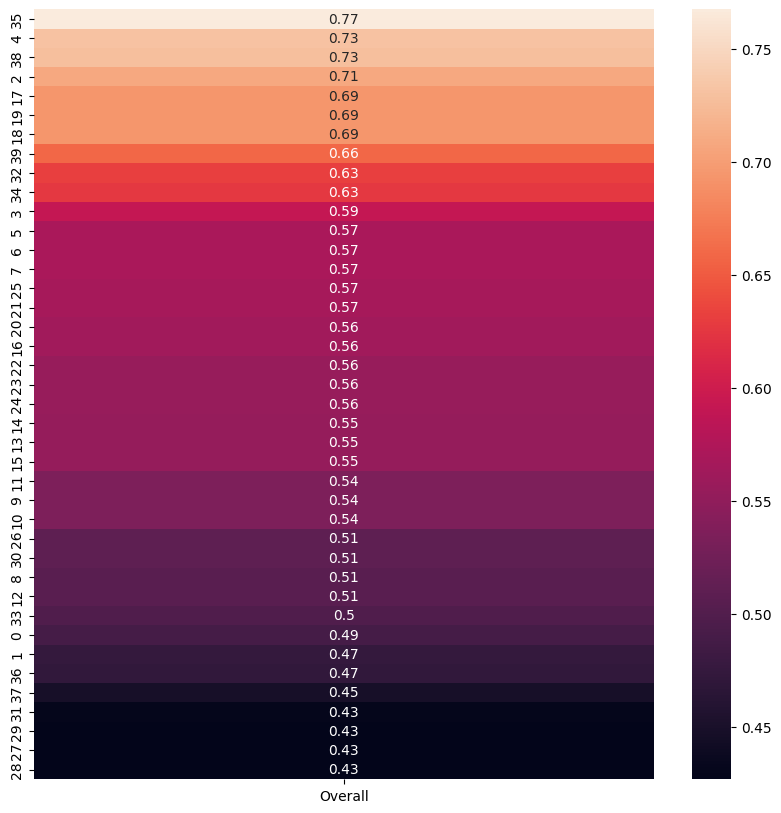

In [308]:
new_df = pd.DataFrame(X_train_scaled_FS)
new_df['Overall'] = y_train.values

# Visualize the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 10))
corr = new_df.corr()[['Overall']]
corr.drop(['Overall'], axis=0, inplace=True)

sns.heatmap(corr.sort_values(by='Overall', ascending=False), ax=ax, annot=True)
plt.show()

Making the model equation polynomial

In [309]:
Poly = PolynomialFeatures(3,include_bias=False,interaction_only=True)

Poly.fit(X_train_scaled_FS)

X_train_scaled_FS_poly = Poly.transform(X_train_scaled_FS)
X_test_scaled_FS_poly = Poly.transform(X_test_scaled_FS)

In [310]:
X_train_scaled_FS_poly.shape

(10539, 10700)

In [311]:
XG = XGBRegressor(n_estimators=100,random_state=42)
XG.fit(X_train_scaled_FS,y_train)

Predict_train = XG.predict(X_train_scaled_FS)
Predict_test = XG.predict(X_test_scaled_FS)

Testing_error = mean_squared_error(y_true=y_test,y_pred=Predict_test)/2
Training_error = mean_squared_error(y_true=y_train,y_pred=Predict_train)/2

print('Training_error : ',Training_error)
print('Testing_error : ',Testing_error)

Training_score = XG.score(X_train_scaled_FS, y_train)
Testing_score = XG.score(X_test_scaled_FS, y_test)

print('Training score Accuracy : ', round(Training_score*100,2),'%')
print('Testing Accuracy : ', round(Testing_score*100,2),'%')

Training_error :  0.01836563472455166
Testing_error :  0.07916031721990976
Training score Accuracy :  99.88 %
Testing Accuracy :  99.46 %


In [312]:
XG = RandomForestRegressor(n_estimators=200,random_state=42)
XG.fit(X_train_scaled_FS,y_train)

Predict_train = XG.predict(X_train_scaled_FS)
Predict_test = XG.predict(X_test_scaled_FS)

Testing_error = mean_squared_error(y_true=y_test,y_pred=Predict_test)/2
Training_error = mean_squared_error(y_true=y_train,y_pred=Predict_train)/2

print('Training_error : ',Training_error)
print('Testing_error : ',Testing_error)

Training_score = XG.score(X_train_scaled_FS, y_train)
Testing_score = XG.score(X_test_scaled_FS, y_test)

print('Training score Accuracy : ', round(Training_score*100,2),'%')
print('Testing Accuracy : ', round(Testing_score*100,2),'%')

Training_error :  0.010878978081411899
Testing_error :  0.06965669354838709
Training score Accuracy :  99.93 %
Testing Accuracy :  99.53 %


Building model with Ridge to making regularization to fix overfitting

In [313]:
LR = Ridge(alpha=30)
LR.fit(X_train_scaled_FS_poly,y_train)

Predict_train = LR.predict(X_train_scaled_FS_poly)
Predict_test = LR.predict(X_test_scaled_FS_poly)

Testing_error = mean_squared_error(y_true=y_test,y_pred=Predict_test)/2
Training_error = mean_squared_error(y_true=y_train,y_pred=Predict_train)/2

print('Training_error : ',Training_error)
print('Testing_error : ',Testing_error)

Training_score = LR.score(X_train_scaled_FS_poly, y_train)
Testing_score = LR.score(X_test_scaled_FS_poly, y_test)

print('Training score Accuracy : ', round(Training_score*100,2),'%')
print('Testing Accuracy : ', round(Testing_score*100,2),'%')

Training_error :  0.17322345200602013
Testing_error :  0.25106694798660384
Training score Accuracy :  98.85 %
Testing Accuracy :  98.3 %


Building model with LinearRegression without regularization

In [314]:
LR = LinearRegression()
LR.fit(X_train_scaled_FS_poly,y_train)

Predict_train = LR.predict(X_train_scaled_FS_poly)
Predict_test = LR.predict(X_test_scaled_FS_poly)

Testing_error = mean_squared_error(y_true=y_test,y_pred=Predict_test)/2
Training_error = mean_squared_error(y_true=y_train,y_pred=Predict_train)/2

print('Training_error : ',Training_error)
print('Testing_error : ',Testing_error)

Training_score = LR.score(X_train_scaled_FS_poly, y_train)
Testing_score = LR.score(X_test_scaled_FS_poly, y_test)

print('Training score Accuracy : ', round(Training_score*100,2),'%')
print('Testing Accuracy : ', round(Testing_score*100,2),'%')

Training_error :  0.14073918128662954
Testing_error :  0.35100684627898576
Training score Accuracy :  99.07 %
Testing Accuracy :  97.63 %
